# Importing Libraries and reading Data.

In [356]:
import pandas as pd
from datasist.structdata import detect_outliers
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [357]:
df = pd.read_csv("School_data.csv")

In [358]:
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


# Getting info about data before working on it.

In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [360]:
df = df.drop('Unnamed: 0', axis=1)

In [361]:
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


# Replacing Missing Values.

In [362]:
cols = ["WklyStudyHours","EthnicGroup","ParentEduc","TestPrep","ParentMaritalStatus","PracticeSport","IsFirstChild","TransportMeans"]
df[cols] = df[cols].fillna(df.mode().iloc[0]) 

In [363]:
col=["NrSiblings"]
df[col]=df[col].fillna(df.mean())
print(df[col].median())

NrSiblings    2.0
dtype: float64


C:\Users\LENVO\AppData\Local\Temp\ipykernel_4312\2332236844.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[col]=df[col].fillna(df.mean())


# Converting the type of column.

In [364]:
df["NrSiblings"]=df["NrSiblings"].astype("int64")

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               30641 non-null  object
 1   EthnicGroup          30641 non-null  object
 2   ParentEduc           30641 non-null  object
 3   LunchType            30641 non-null  object
 4   TestPrep             30641 non-null  object
 5   ParentMaritalStatus  30641 non-null  object
 6   PracticeSport        30641 non-null  object
 7   IsFirstChild         30641 non-null  object
 8   NrSiblings           30641 non-null  int64 
 9   TransportMeans       30641 non-null  object
 10  WklyStudyHours       30641 non-null  object
 11  MathScore            30641 non-null  int64 
 12  ReadingScore         30641 non-null  int64 
 13  WritingScore         30641 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 3.3+ MB


# Removing Duplicates.

In [366]:
df.drop_duplicates(inplace=True, keep=False)

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30639 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               30639 non-null  object
 1   EthnicGroup          30639 non-null  object
 2   ParentEduc           30639 non-null  object
 3   LunchType            30639 non-null  object
 4   TestPrep             30639 non-null  object
 5   ParentMaritalStatus  30639 non-null  object
 6   PracticeSport        30639 non-null  object
 7   IsFirstChild         30639 non-null  object
 8   NrSiblings           30639 non-null  int64 
 9   TransportMeans       30639 non-null  object
 10  WklyStudyHours       30639 non-null  object
 11  MathScore            30639 non-null  int64 
 12  ReadingScore         30639 non-null  int64 
 13  WritingScore         30639 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 3.5+ MB


# Collecting Important info about the data.

In [368]:
df.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,30639.000000,30639.000000,30639.000000,30639.000000
mean,2.138484,66.559548,69.377884,68.419302
std,1.420723,15.361462,14.759369,15.443799
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


# Removing Outliers.

In [369]:
idx = detect_outliers(df,0,['NrSiblings','ReadingScore','MathScore','WritingScore'])
df = df.drop(idx,axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30183 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               30183 non-null  object
 1   EthnicGroup          30183 non-null  object
 2   ParentEduc           30183 non-null  object
 3   LunchType            30183 non-null  object
 4   TestPrep             30183 non-null  object
 5   ParentMaritalStatus  30183 non-null  object
 6   PracticeSport        30183 non-null  object
 7   IsFirstChild         30183 non-null  object
 8   NrSiblings           30183 non-null  int64 
 9   TransportMeans       30183 non-null  object
 10  WklyStudyHours       30183 non-null  object
 11  MathScore            30183 non-null  int64 
 12  ReadingScore         30183 non-null  int64 
 13  WritingScore         30183 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 3.5+ MB


# Getting Correlation Between Columns.

In [370]:
cor = df[['NrSiblings','ReadingScore','MathScore','WritingScore']].corr()
print(cor)

              NrSiblings  ReadingScore  MathScore  WritingScore
NrSiblings      1.000000     -0.003194  -0.005071     -0.005236
ReadingScore   -0.003194      1.000000   0.811091      0.950574
MathScore      -0.005071      0.811091   1.000000      0.799865
WritingScore   -0.005236      0.950574   0.799865      1.000000


# Creating New Column (Sum Of Grades) and reorder all Columns.

In [371]:
df['SumOfGrades'] = df[['ReadingScore','MathScore','WritingScore']].sum(axis=1)
df['ID'] = range(0, len(df))
df = df.reindex(columns=['ID', 'Gender', 'EthnicGroup','ParentEduc','LunchType','TestPrep','ParentMaritalStatus','PracticeSport','IsFirstChild','NrSiblings','TransportMeans','WklyStudyHours','MathScore','ReadingScore','WritingScore','SumOfGrades'])
df.to_csv('DFM.csv', index=False)
df

,ID,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,SumOfGrades
0,0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3,school_bus,< 5,71,71,74,216
1,1,female,group C,some college,standard,none,married,sometimes,yes,0,school_bus,5 - 10,69,90,88,247
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4,school_bus,< 5,87,93,91,271
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1,school_bus,5 - 10,45,56,42,143
4,4,male,group C,some college,standard,none,married,sometimes,yes,0,school_bus,5 - 10,76,78,75,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,30178,female,group D,high school,standard,none,single,sometimes,no,2,school_bus,5 - 10,59,61,65,185
30637,30179,male,group E,high school,standard,none,single,regularly,no,1,private,5 - 10,58,53,51,162
30638,30180,female,group C,high school,free/reduced,completed,married,sometimes,no,1,private,5 - 10,61,70,67,198
30639,30181,female,group D,associate's degree,standard,completed,married,regularly,no,3,school_bus,5 - 10,82,90,93,265


Question 1: What is the number of parents defined by their education?

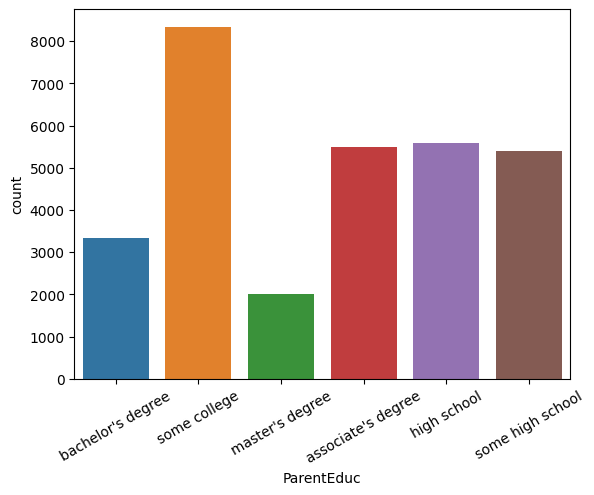

In [372]:
sns.countplot(x = df['ParentEduc'])
plt.xticks(rotation=30)
plt.show()

Question 2: What is the number of students defined by their Weekly Studing Hours?

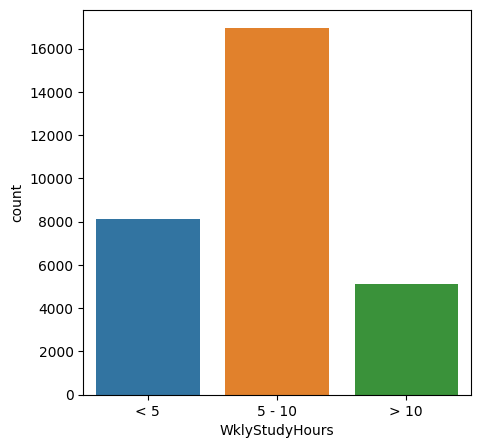

In [373]:
plt.subplots(figsize=(5, 5))
sns.countplot(data=df, x='WklyStudyHours', orient='vertical')
plt.show()

Question 3: What is the Percentage of Transportation Ways?

([<matplotlib.patches.Wedge at 0x179bb8e62d0>,
 [Text(-0.4360965566864883, 1.0098612742580977, 'school_bus'),
  Text(0.4360965566864881, -1.0098612742580977, 'private')],
 [Text(-0.23787084910172085, 0.5508334223225987, '63.0%'),
  Text(0.23787084910172077, -0.5508334223225987, '37.0%')])

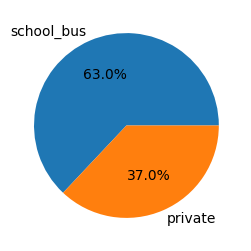

In [374]:
plt.subplots(figsize=(3, 3))
plt.pie(df.TransportMeans.value_counts(), labels=df.TransportMeans.unique(), autopct='%.1f%%')

# Converting the type of column.

In [375]:
df["ParentMaritalStatus"] = df["ParentMaritalStatus"].astype('category')

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30183 entries, 0 to 30640
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   30183 non-null  int64   
 1   Gender               30183 non-null  object  
 2   EthnicGroup          30183 non-null  object  
 3   ParentEduc           30183 non-null  object  
 4   LunchType            30183 non-null  object  
 5   TestPrep             30183 non-null  object  
 6   ParentMaritalStatus  30183 non-null  category
 7   PracticeSport        30183 non-null  object  
 8   IsFirstChild         30183 non-null  object  
 9   NrSiblings           30183 non-null  int64   
 10  TransportMeans       30183 non-null  object  
 11  WklyStudyHours       30183 non-null  object  
 12  MathScore            30183 non-null  int64   
 13  ReadingScore         30183 non-null  int64   
 14  WritingScore         30183 non-null  int64   
 15  SumOfGrades        

# Dividing Column into many columns by use Hot Encoding

In [377]:
df = pd.get_dummies(df, columns = ['ParentMaritalStatus'])

In [378]:
df

,ID,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,SumOfGrades,ParentMaritalStatus_divorced,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed
0,0,female,group C,bachelor's degree,standard,none,regularly,yes,3,school_bus,< 5,71,71,74,216,0,1,0,0
1,1,female,group C,some college,standard,none,sometimes,yes,0,school_bus,5 - 10,69,90,88,247,0,1,0,0
2,2,female,group B,master's degree,standard,none,sometimes,yes,4,school_bus,< 5,87,93,91,271,0,0,1,0
3,3,male,group A,associate's degree,free/reduced,none,never,no,1,school_bus,5 - 10,45,56,42,143,0,1,0,0
4,4,male,group C,some college,standard,none,sometimes,yes,0,school_bus,5 - 10,76,78,75,229,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,30178,female,group D,high school,standard,none,sometimes,no,2,school_bus,5 - 10,59,61,65,185,0,0,1,0
30637,30179,male,group E,high school,standard,none,regularly,no,1,private,5 - 10,58,53,51,162,0,0,1,0
30638,30180,female,group C,high school,free/reduced,completed,sometimes,no,1,private,5 - 10,61,70,67,198,0,1,0,0
30639,30181,female,group D,associate's degree,standard,completed,regularly,no,3,school_bus,5 - 10,82,90,93,265,0,1,0,0


Question 4: What is the Relation between parent status and sum of grades?

In [379]:
independent_vars = ['ParentMaritalStatus_divorced', 'ParentMaritalStatus_married', 'ParentMaritalStatus_single','ParentMaritalStatus_widowed']
dependent_var = 'SumOfGrades'
corrs = df[independent_vars].corrwith(df[dependent_var])
print(corrs)

ParentMaritalStatus_divorced    0.007739
ParentMaritalStatus_married     0.001920
ParentMaritalStatus_single     -0.010051
ParentMaritalStatus_widowed     0.003298
dtype: float64


Question 5: What is the Relation between testprep and sum of grades?

In [380]:
df["TestPrep"] = df["TestPrep"].astype('category')
df = pd.get_dummies(df, columns = ['TestPrep'])
independent_vars = ['TestPrep_completed', 'TestPrep_none']
dependent_var = 'SumOfGrades'
corrs = df[independent_vars].corrwith(df[dependent_var])
print(corrs)

TestPrep_completed    0.214996
TestPrep_none        -0.214996
dtype: float64


Question 6: What is the highest grade in every group?

In [381]:
df.groupby('EthnicGroup').max()['SumOfGrades']

EthnicGroup
group A    300
group B    298
group C    300
group D    300
group E    300
Name: SumOfGrades, dtype: int64

Question 7: Which group have more grades?

In [382]:
df.groupby('EthnicGroup').sum(numeric_only=True)['SumOfGrades']

EthnicGroup
group A     426613
group B    1133456
group C    2189039
group D    1551640
group E     887872
Name: SumOfGrades, dtype: int64

Question 8: What is the top 10 highest grades without duplication?

In [383]:
top_10 = df['SumOfGrades'].drop_duplicates().sort_values(ascending=False).head(10)
print(top_10)

432    300
166    299
958    298
105    297
153    296
138    295
563    294
855    293
907    292
681    291
Name: SumOfGrades, dtype: int64


Question 9: What is the average grade for each group?

In [384]:
df.groupby('EthnicGroup').mean(numeric_only=True)['SumOfGrades']

EthnicGroup
group A    195.963712
group B    197.707309
group C    201.457666
group D    209.285136
group E    222.357125
Name: SumOfGrades, dtype: float64

Question 10: How many student have more than 50% of the sum of the grades?

In [385]:
df[df['SumOfGrades']>150]['SumOfGrades'].count()

26982

Question 11: What is the Distribution of students that practice sport?

In [386]:
df['PracticeSport'].value_counts()

sometimes    15605
regularly    10640
never         3938
Name: PracticeSport, dtype: int64

Question 12: What is the percentage of students that Practice and didn't practice sport?

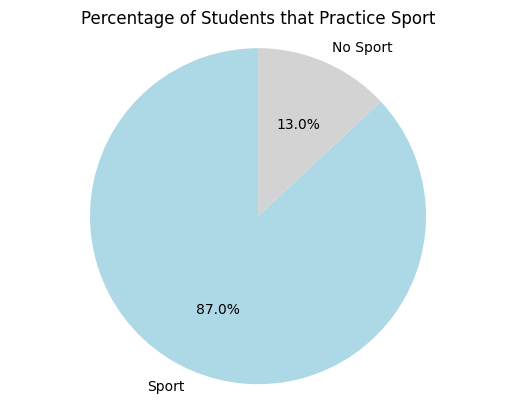

In [387]:
num_sport_students = ((df['PracticeSport'] == 'sometimes').sum() + (df['PracticeSport'] == 'regularly').sum())
num_non_sport_students = (df['PracticeSport'] == 'never').sum()

labels = ['Sport', 'No Sport']
sizes = [num_sport_students, num_non_sport_students]
colors = ['lightblue', 'lightgray']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Students that Practice Sport')
plt.axis('equal')
plt.show()

Question 13: What is the percentage of students that complete and didn't complete TestPrep?

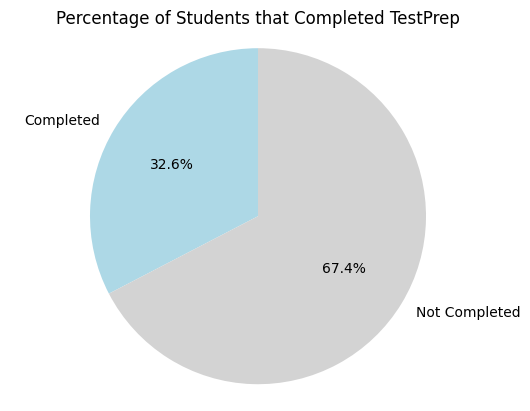

In [388]:
CT = ((df['TestPrep_completed'] == 1).sum()/len(df)) * 100
NCT = 100 - CT

labels = ['Completed', 'Not Completed']
sizes = [CT, NCT]
colors = ['lightblue', 'lightgray']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Students that Completed TestPrep')
plt.axis('equal')
plt.show()

# Dividing Column into many columns by use Label Encoding

In [389]:
df["IsFirstChild"] = df["IsFirstChild"].astype('category')
df['IsFirstChild'] = df['IsFirstChild'].cat.codes

In [390]:
df

,ID,Gender,EthnicGroup,ParentEduc,LunchType,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,SumOfGrades,ParentMaritalStatus_divorced,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,TestPrep_completed,TestPrep_none
0,0,female,group C,bachelor's degree,standard,regularly,1,3,school_bus,< 5,71,71,74,216,0,1,0,0,0,1
1,1,female,group C,some college,standard,sometimes,1,0,school_bus,5 - 10,69,90,88,247,0,1,0,0,0,1
2,2,female,group B,master's degree,standard,sometimes,1,4,school_bus,< 5,87,93,91,271,0,0,1,0,0,1
3,3,male,group A,associate's degree,free/reduced,never,0,1,school_bus,5 - 10,45,56,42,143,0,1,0,0,0,1
4,4,male,group C,some college,standard,sometimes,1,0,school_bus,5 - 10,76,78,75,229,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,30178,female,group D,high school,standard,sometimes,0,2,school_bus,5 - 10,59,61,65,185,0,0,1,0,0,1
30637,30179,male,group E,high school,standard,regularly,0,1,private,5 - 10,58,53,51,162,0,0,1,0,0,1
30638,30180,female,group C,high school,free/reduced,sometimes,0,1,private,5 - 10,61,70,67,198,0,1,0,0,1,0
30639,30181,female,group D,associate's degree,standard,regularly,0,3,school_bus,5 - 10,82,90,93,265,0,1,0,0,1,0


Question 14: What is the relation between first child and grades?

In [391]:
df['IsFirstChild'].corr(df['SumOfGrades'])

0.01432534618640389

Question 15: What is the percentage of parents have completed their education up to the college level?

In [392]:
df['ParentEduc'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

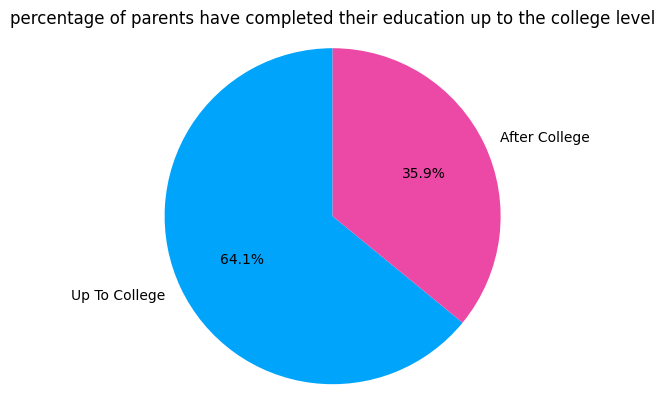

In [393]:
UTC = (df['ParentEduc'] == 'some college').sum() + (df['ParentEduc'] == 'high school').sum() + (df['ParentEduc'] == 'some high school').sum()
AC = len(df) - UTC
labels = ['Up To College', 'After College']
sizes = [UTC, AC]
colors = ['#00A4FB','#EC49A6']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('percentage of parents have completed their education up to the college level')
plt.axis('equal')
plt.show()

Question 16: What is the marital status of the majority of the parents?

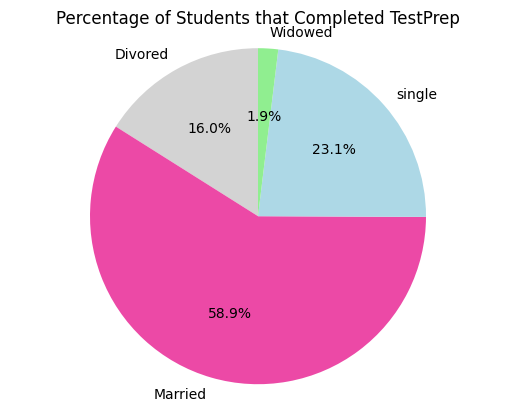

In [394]:
divored = (df['ParentMaritalStatus_divorced'] == 1).sum()
married = (df['ParentMaritalStatus_married'] == 1 ).sum()
single = (df['ParentMaritalStatus_single'] == 1).sum()
widowed = (df['ParentMaritalStatus_widowed'] == 1).sum()

labels = ['Divored', 'Married', 'single', 'Widowed']
sizes = [divored, married, single, widowed]
colors = ['lightgrey','#EC49A6','lightblue','lightgreen']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Students that Completed TestPrep')
plt.axis('equal')
plt.show()

Question 17: How many students have siblings?

In [395]:
HS = len(df) - (df['NrSiblings'] == 0).sum()
print (HS)

27116


Question 18: What is the distribution of the Is First Child variable?

In [396]:
variance = df['IsFirstChild'].var()
print (variance)

0.22686639660551589


Question 19: How many students belonging to each Ethnic Group?

In [397]:
df['EthnicGroup'].value_counts()

group C    10866
group D     7414
group B     5733
group E     3993
group A     2177
Name: EthnicGroup, dtype: int64

Question 20: What is the most common type of lunch provided to the students?

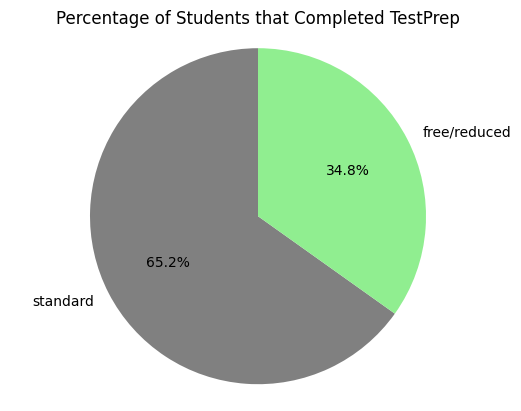

In [398]:
standard = (df['LunchType'] == 'standard').sum()
free_reduced = (df['LunchType'] == 'free/reduced' ).sum()

labels = ['standard', 'free/reduced']
sizes = [standard, free_reduced]
colors = ['grey','lightgreen']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Students that Completed TestPrep')
plt.axis('equal')
plt.show()

Question 21: How many male and female students have completed the test preparation course?

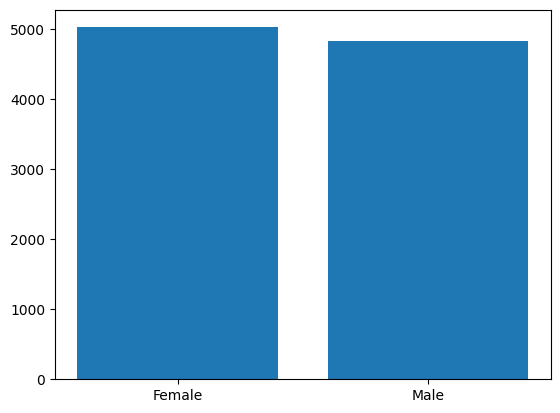

In [399]:
completed_df = df[df['TestPrep_completed'] == 1]
num_female_students = len(completed_df[completed_df['Gender'] == 'female'])
num_male_students = len(completed_df[completed_df['Gender'] == 'male'])

plt.subplots()
plt.bar(['Female', 'Male'], [num_female_students, num_male_students])
plt.show()

Question 22: How does the number of siblings affect the sum of grads?

<Axes: xlabel='NrSiblings', ylabel='SumOfGrades'>

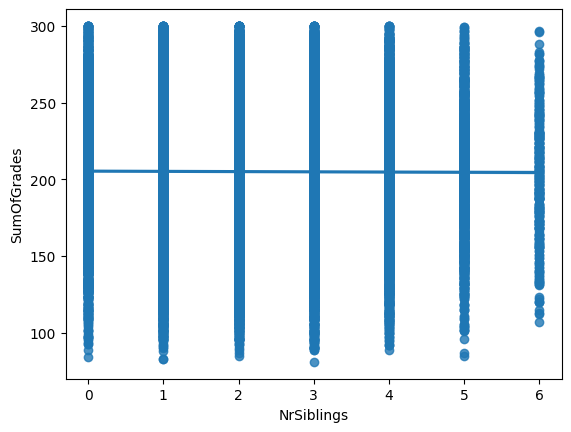

In [400]:
df['NrSiblings'].corr(df['SumOfGrades'])
sns.regplot(x=df['NrSiblings'], y=df['SumOfGrades'])

Question 23: How many male and female are in each group?

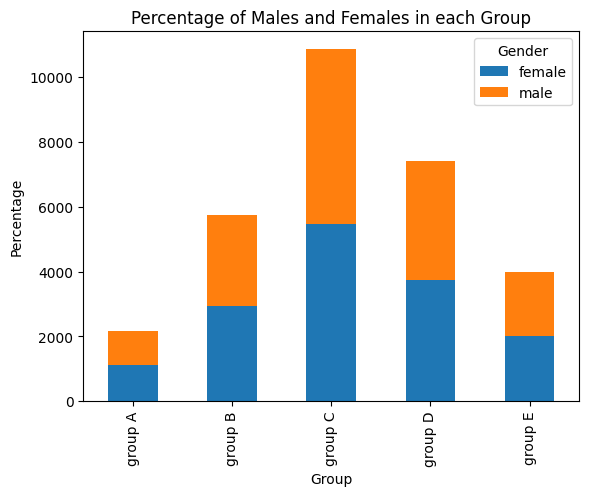

In [401]:
group_counts = df.groupby(['EthnicGroup', 'Gender']).size().unstack()
group_percentages = group_counts.apply(lambda x: x , axis=1)
group_percentages.plot(kind='bar', stacked=True)
plt.xlabel('Group')
plt.ylabel('Percentage')
plt.title('Percentage of Males and Females in each Group')
plt.show()

Question 24: How many students practice sport defined by their gender?

In [402]:
df.groupby(['Gender', 'PracticeSport']).size()

Gender  PracticeSport
female  never            1994
        regularly        5389
        sometimes        7845
male    never            1944
        regularly        5251
        sometimes        7760
dtype: int64

# Machine Learning

In [403]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

In [404]:
california = fetch_california_housing()

In [405]:
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2, random_state=42)

In [406]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [407]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

LinearRegression()

In [408]:
#mse
y_pred = reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 0.5558915986952442


In [409]:
df = pd.read_csv('DFM.csv')

In [410]:
df.head()

,ID,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,SumOfGrades
0,0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3,school_bus,< 5,71,71,74,216
1,1,female,group C,some college,standard,none,married,sometimes,yes,0,school_bus,5 - 10,69,90,88,247
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4,school_bus,< 5,87,93,91,271
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1,school_bus,5 - 10,45,56,42,143
4,4,male,group C,some college,standard,none,married,sometimes,yes,0,school_bus,5 - 10,76,78,75,229


In [411]:
X = df.drop('SumOfGrades', axis=1)
y = df['SumOfGrades']

In [412]:
categorical_features = ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans']
numerical_features = ['MathScore', 'ReadingScore', 'WritingScore']

preprocessor = ColumnTransformer([('cat', OneHotEncoder(), categorical_features),
                                   ('num', StandardScaler(), numerical_features)])

X_preprocessed = preprocessor.fit_transform(X)

In [413]:
reg = LinearRegression()
reg.fit(X_train, y_train)
print(y_test)

[0.477   0.458   5.00001 ... 5.00001 0.723   1.515  ]


In [414]:
X = df.drop('SumOfGrades', axis=1)
y = df['SumOfGrades']

In [415]:
categorical_features = ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans']
numerical_features = [ 'MathScore', 'ReadingScore', 'WritingScore']

In [416]:
categorical_features = [ 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans']
numerical_features = [ 'MathScore', 'ReadingScore', 'WritingScore']

preprocessor = ColumnTransformer([('cat', OneHotEncoder(), categorical_features),
                                   ('num', StandardScaler(), numerical_features)])

X_preprocessed = preprocessor.fit_transform(X)

In [417]:
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2, random_state=42)

In [418]:
print('1:Predicted SumOfGrades:', y_test[:10])
print('2:Predicted SumOfGrades:', y_pred[:10])

1:Predicted SumOfGrades: [0.477   0.458   5.00001 2.186   2.78    1.587   1.982   1.575   3.4
 4.466  ]
2:Predicted SumOfGrades: [0.71912284 1.76401657 2.70965883 2.83892593 2.60465725 2.01175367
 2.64550005 2.16875532 2.74074644 3.91561473]


In [419]:
LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_train, y_train)

LinearRegression()

In [420]:
training_score = LinearRegressionModel.score(X_train, y_train)
print('Linear Regression Train Score is: ', training_score)

Linear Regression Train Score is:  0.6125511913966953


In [421]:
testing_score = LinearRegressionModel.score(X_test, y_test)
print('Linear Regression Test Score is: ', testing_score)

Linear Regression Test Score is:  0.5757877060324521


In [422]:
data = pd.read_csv("DFM.csv")
print(data.sample(5))

          ID  Gender EthnicGroup        ParentEduc     LunchType TestPrep  \
10590  10590    male     group B      some college  free/reduced     none   
8470    8470  female     group C      some college  free/reduced     none   
8195    8195  female     group A       high school      standard     none   
8467    8467  female     group D      some college      standard     none   
10716  10716  female     group E  some high school  free/reduced     none   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
10590             married     sometimes          yes           1   
8470               single         never          yes           2   
8195              married     sometimes           no           3   
8467              married         never          yes           3   
10716              single     regularly          yes           2   

      TransportMeans WklyStudyHours  MathScore  ReadingScore  WritingScore  \
10590        private         5 - 10         77    

In [423]:
data = data[["EthnicGroup", "SumOfGrades"]]
print(data.sample(10))

      EthnicGroup  SumOfGrades
14306     group D          196
21925     group D          216
11199     group C          203
21583     group C          124
8161      group C          178
18279     group A          141
3822      group D          156
28624     group B          188
893       group D          157
4212      group C          229


In [424]:
def map_sum_of_grades(x):
    if x < 150:
        return "not success"
    else:
        return "success"
data["SumOfGrades"] = data["SumOfGrades"].apply(map_sum_of_grades)
print(data.sample(5))

      EthnicGroup SumOfGrades
4827      group B     success
1536      group C     success
13284     group C     success
5099      group B     success
27131     group D     success


In [425]:
data = data.rename(columns=lambda x: x.strip())

In [426]:
x = np.array(data["EthnicGroup"])
y = np.array(data["SumOfGrades"])

In [427]:
cv = CountVectorizer()
x = cv.fit_transform(x)

In [428]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [429]:
model = BernoulliNB()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.8933244989233062


In [430]:
sample = "Check this out: https://thecleverprogrammer.com/" 
data = cv.transform([sample]).toarray()
print(model.predict(data))

['success']
